In [1]:
import pandas as pd
import numpy as np
import datetime
import requests
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#from google.colab import files
#uploaded = files.upload()

Saving countries-aggregated_csv.csv to countries-aggregated_csv (1).csv


In [2]:
#import io
#df_covid = pd.read_csv(io.BytesIO(uploaded['countries-aggregated_csv.csv']))
df_covid=pd.read_csv("countries-aggregated_csv.csv")
df_covid

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0
...,...,...,...,...,...
48311,2020-09-30,Zimbabwe,7838,6303,228
48312,2020-10-01,Zimbabwe,7850,6312,228
48313,2020-10-02,Zimbabwe,7858,6322,228
48314,2020-10-03,Zimbabwe,7885,6327,228


In [3]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48316 entries, 0 to 48315
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       48316 non-null  object
 1   Country    48316 non-null  object
 2   Confirmed  48316 non-null  int64 
 3   Recovered  48316 non-null  int64 
 4   Deaths     48316 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.8+ MB


In [ ]:
df_covid['Country'].nunique()

188

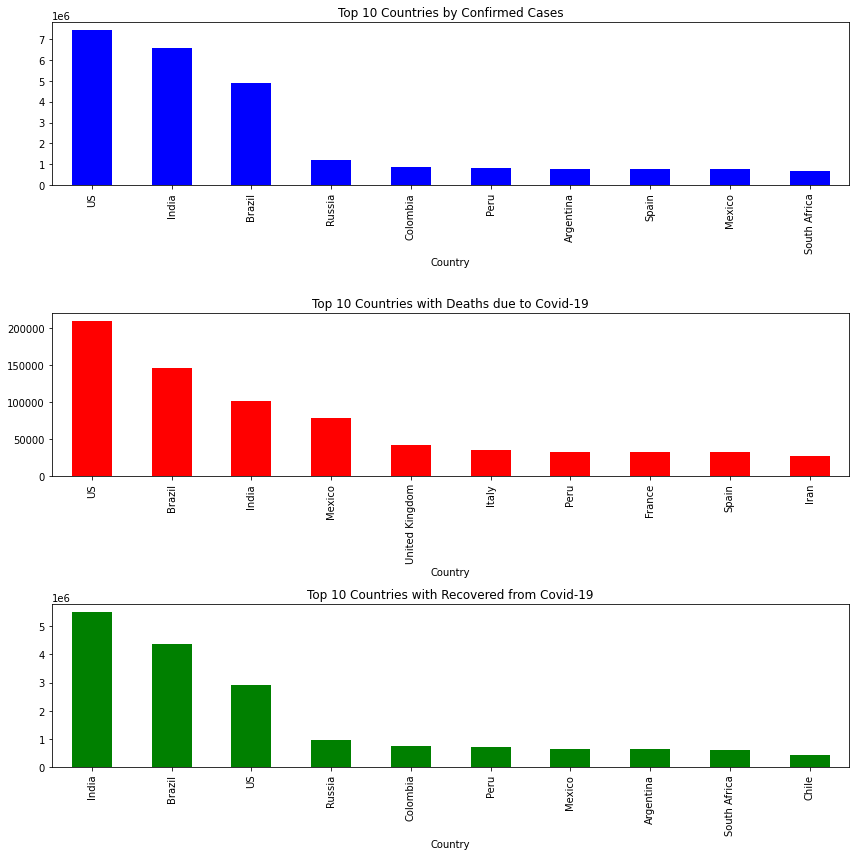

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
pivot=pd.pivot_table(df_covid,columns='Country',index='Date',values='Confirmed',aggfunc=np.sum)

pivot_deaths=pd.pivot_table(df_covid,columns='Country',index='Date',values='Deaths',aggfunc=np.sum)

pivot_recovered=pd.pivot_table(df_covid,columns='Country',index='Date',values='Recovered',aggfunc=np.sum)

country_list=[]
value_list=[]
deaths_list=[]
recovered_list=[]
for country in list(pivot.columns):
    country_list.append(country)
    value_list.append(pivot[country].max())
    deaths_list.append(pivot_deaths[country].max())
    recovered_list.append(pivot_recovered[country].max())
    new_dict={'Country':country_list,'Confirmed':value_list,'Deaths':deaths_list,'Recovered':recovered_list}
df=pd.DataFrame.from_dict(new_dict)
df.set_index('Country',inplace=True)

plt.figure(figsize=(12,12))
plt.subplot(3,1,1)
df['Confirmed'].sort_values(ascending=False)[:10].plot(kind='bar',color='blue')
plt.title('Top 10 Countries by Confirmed Cases')
plt.subplot(3,1,2)
df['Deaths'].sort_values(ascending=False)[:10].plot(kind='bar',color='red')
plt.title('Top 10 Countries with Deaths due to Covid-19')
plt.subplot(3,1,3)
df['Recovered'].sort_values(ascending=False)[:10].plot(kind='bar',color='green')
plt.title('Top 10 Countries with Recovered from Covid-19')
plt.tight_layout()

In [4]:
country_cases = df_covid.groupby('Country')['Confirmed','Deaths','Recovered'].max().reset_index()

country_cases['Active'] = country_cases['Confirmed'] - (country_cases['Deaths']+country_cases['Recovered'])
country_cases["Death Rate (per 100)"] = np.round(100*country_cases["Deaths"]/country_cases["Confirmed"],2)
country_cases["Recovered Rate (per 100)"] = np.round(100*country_cases["Recovered"]/country_cases["Confirmed"],2)
country_cases.sort_values('Confirmed', ascending= False).fillna(0).style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Blues',subset=["Deaths"])\
                        .background_gradient(cmap='Blues',subset=["Recovered"])\
                        .background_gradient(cmap='Blues',subset=["Active"])\
                        .background_gradient(cmap='Blues',subset=["Death Rate (per 100)"])\
                        .background_gradient(cmap='Blues',subset=["Recovered Rate (per 100)"])

,Country,Confirmed,Deaths,Recovered,Active,Death Rate (per 100),Recovered Rate (per 100)
174,US,7420971,209794,2911699,4299478,2.830000,39.240000
79,India,6549373,101782,5509966,937625,1.550000,84.130000
23,Brazil,4915289,146352,4375354,393583,2.980000,89.020000
140,Russia,1209039,21260,975488,212291,1.760000,80.680000
37,Colombia,855052,26712,761674,66666,3.120000,89.080000
134,Peru,821564,32609,700868,88087,3.970000,85.310000
6,Argentina,798486,21018,636672,140796,2.630000,79.730000
158,Spain,789932,32086,150376,607470,4.060000,19.040000
113,Mexico,761665,79088,645123,37454,10.380000,84.700000
156,South Africa,681289,16976,614781,49532,2.490000,90.240000


Text(0.5, 1.0, 'Cumulative trend plot for Confirmed Cases')

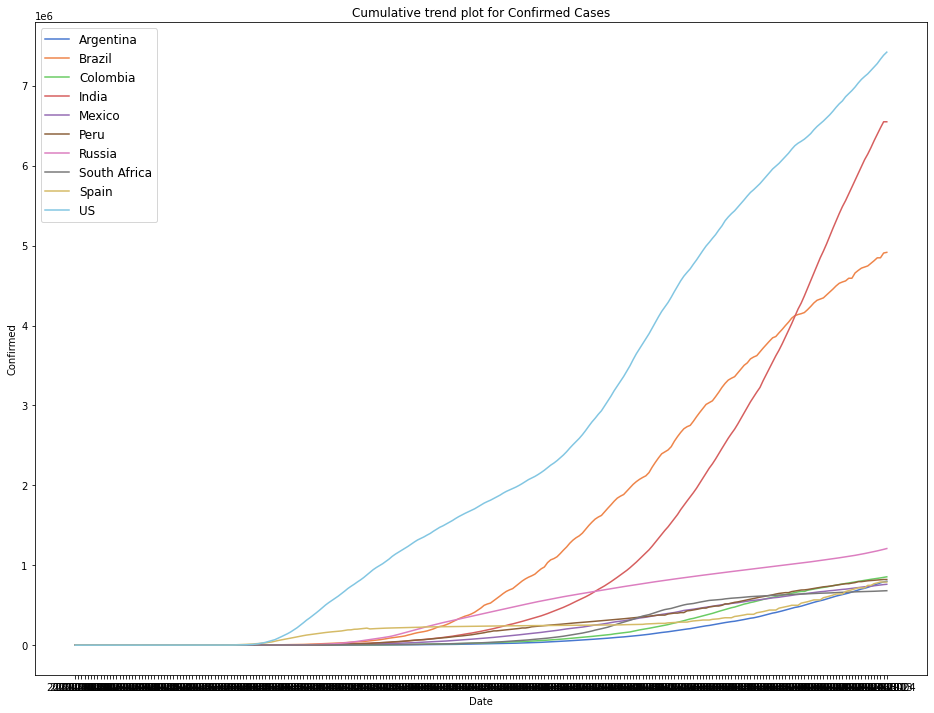

In [ ]:
top_confirmed=df.sort_values(by='Confirmed',ascending=False)[:10]
list_countries=list(top_confirmed.index)
list_countries.append('India')
times_series_cntr = df_covid.groupby(['Date','Country'])['Confirmed'].sum()\
                    .reset_index().set_index('Date')
df_countries_tm = times_series_cntr[times_series_cntr['Country'].isin(list_countries)]


plt.figure(figsize=(16,12))
ax = sns.lineplot(x=df_countries_tm.index, y="Confirmed", hue="Country", data=df_countries_tm,palette='muted').set_title('Cumulative line')
plt.legend(loc=2, prop={'size': 12})
plt.title('Cumulative trend plot for Confirmed Cases')



We can see that China has stabilized its new case reporting while all other countries are showing increase in trend.
There is huge variance in dates from when there has been sudden increase in cases.
In case of Argentina, their data indicates that , they realized and understood the pattern quite soon enough, and been able to cap increasing trend.
India has very low number of confirmed reports in the initial stage but it has seen sudden increase in number of confirmed cases later.

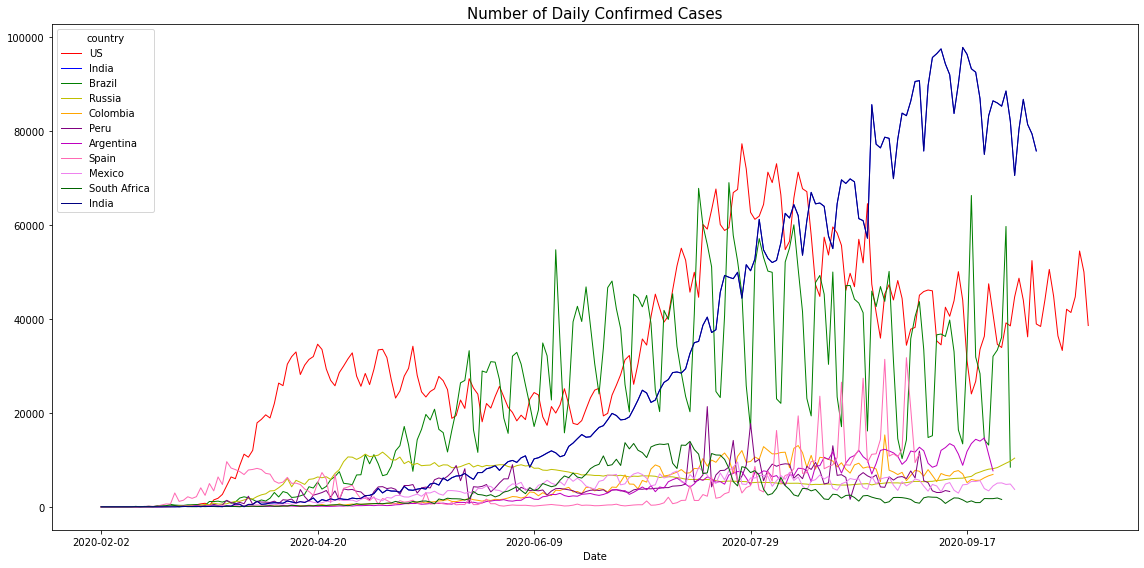

In [ ]:
Confirm_pivot=pd.pivot_table(df_covid,index='Date',columns='Country',values='Confirmed',aggfunc=np.sum)
plt.figure(figsize=(16,8))
colors=['r','b','g','y','orange','purple','m','hotpink','violet','darkgreen','navy','brown']
for i,country in enumerate(list_countries):
    Confirm=Confirm_pivot[Confirm_pivot[country]>0][country].diff().fillna(0)
    Confirm=Confirm[Confirm>0]
    Confirm.plot(color=colors[i],label=country,markersize=12,lw=1)    
    plt.title('Number of Daily Confirmed Cases',fontsize=15)
    plt.legend(title='country')
plt.tight_layout()
                          

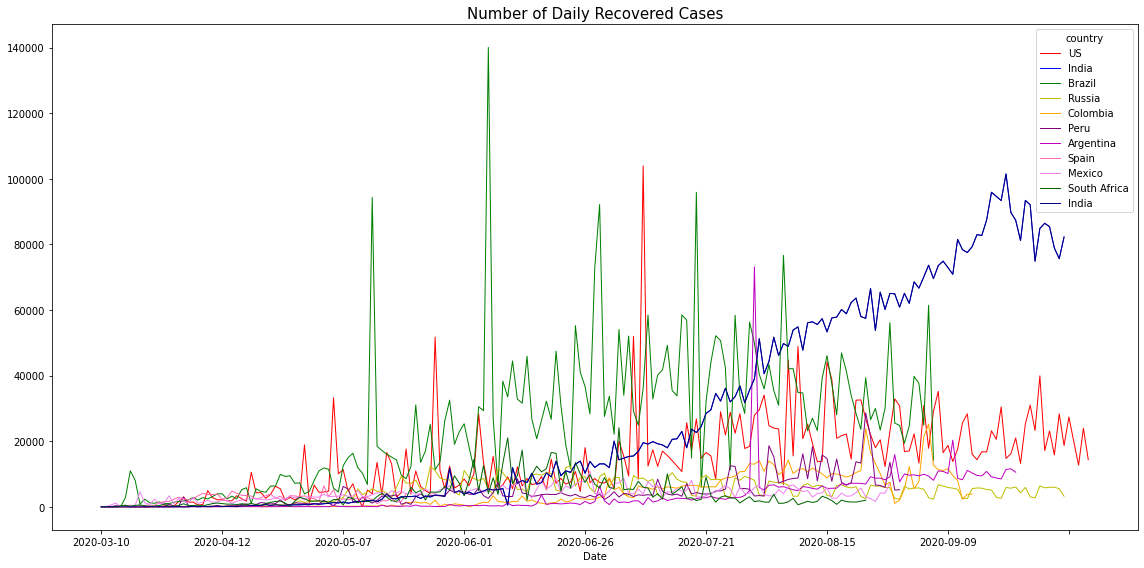

In [ ]:
Recovered_pivot=pd.pivot_table(df_covid,index='Date',columns='Country',values='Recovered',aggfunc=np.sum)
plt.figure(figsize=(16,8))
colors=['r','b','g','y','orange','purple','m','hotpink','violet','darkgreen','navy','brown']
for i,country in enumerate(list_countries):
    Recovered=Recovered_pivot[Recovered_pivot[country]>0][country].diff().fillna(0)
    Recovered=Recovered[Recovered>0]
    Recovered.plot(color=colors[i],label=country,markersize=12,lw=1)    
    plt.title('Number of Daily Recovered Cases',fontsize=15)
    plt.legend(title='country')
plt.tight_layout()
                          

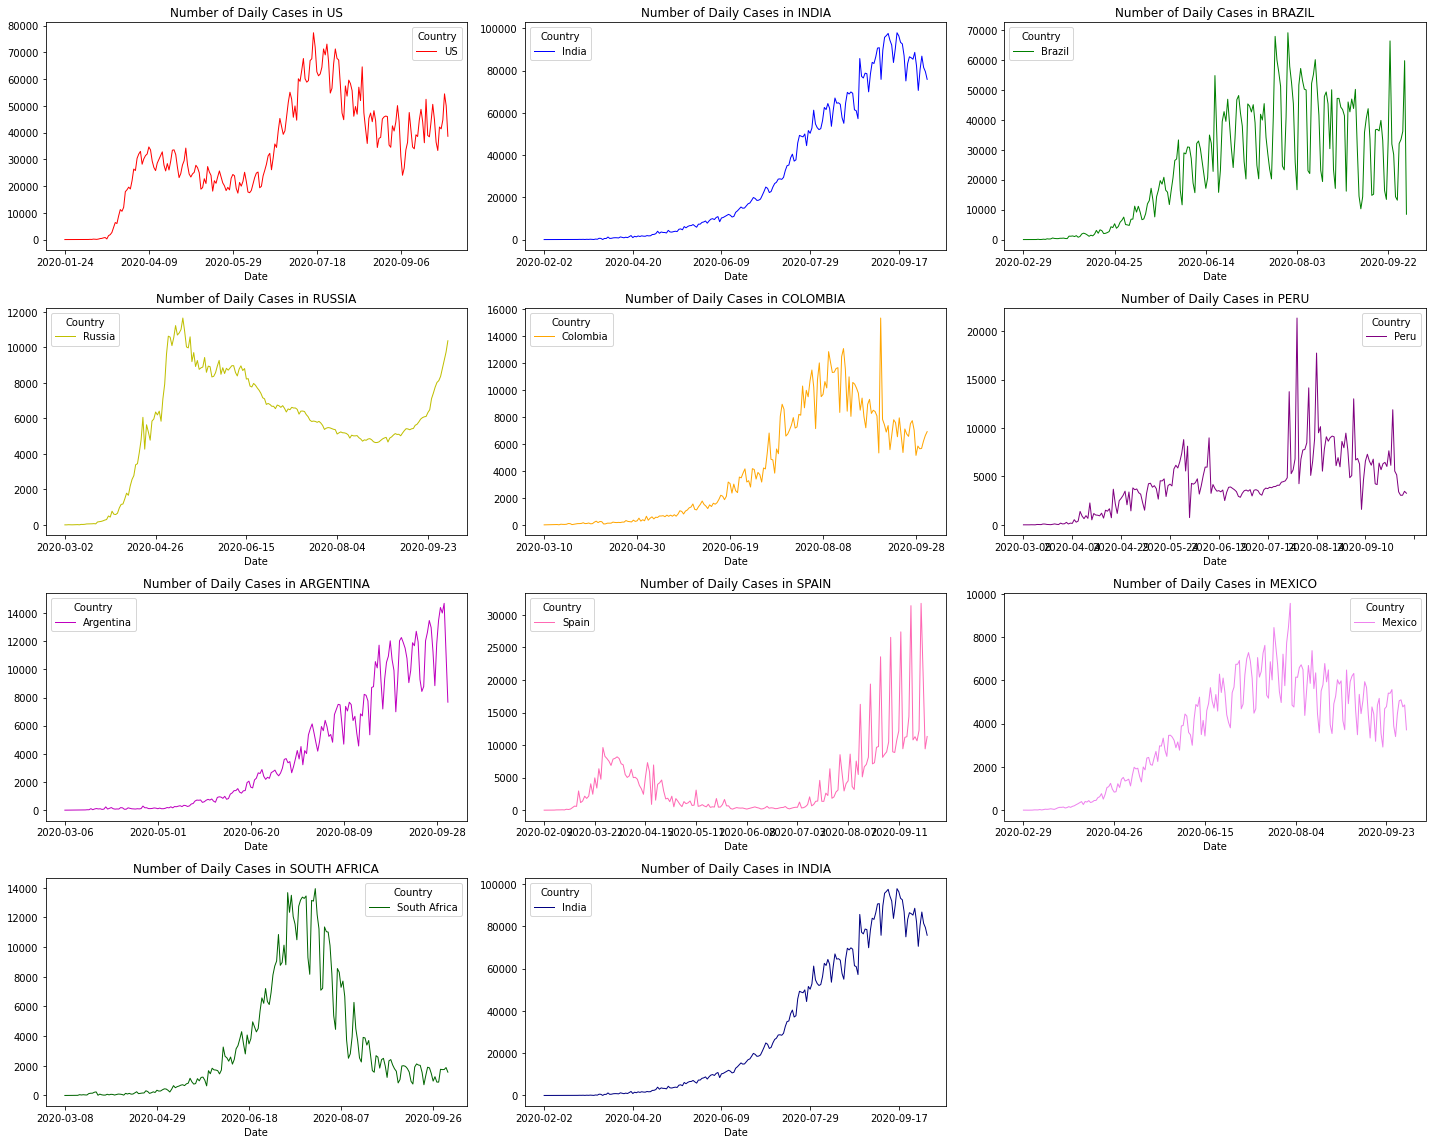

In [ ]:
plt.figure(figsize=(20,16))
colors=['r','b','g','y','orange','purple','m','hotpink','violet','darkgreen','navy','brown']
for i,country in enumerate(list_countries):
    Confirm=Confirm_pivot[Confirm_pivot[country]>0][country].diff().fillna(0)
    Confirm=Confirm[Confirm>0]
    
    plt.subplot(4,3,i+1)
    Confirm.plot(color=colors[i],label=country,markersize=12,lw=1)    
    plt.xticks()
    plt.legend(title='Country')
    plt.title('Number of Daily Cases in {}'.format(country.upper()))
plt.tight_layout()

In [ ]:
for country in list_countries:
    id_max=Confirm_pivot[country].diff().fillna(0).idxmax()
    maxim=Confirm_pivot[country].diff().fillna(0).max()
    print('Maximum New Cases registered for {0} was {1} on {2}'.format(country,maxim,id_max))


Maximum New Cases registered for US was 77362.0 on 2020-07-16
Maximum New Cases registered for India was 97894.0 on 2020-09-16
Maximum New Cases registered for Brazil was 69074.0 on 2020-07-29
Maximum New Cases registered for Russia was 11656.0 on 2020-05-11
Maximum New Cases registered for Colombia was 15318.0 on 2020-09-09
Maximum New Cases registered for Peru was 21358.0 on 2020-08-02
Maximum New Cases registered for Argentina was 14687.0 on 2020-10-02
Maximum New Cases registered for Spain was 31785.0 on 2020-09-28
Maximum New Cases registered for Mexico was 9556.0 on 2020-08-01
Maximum New Cases registered for South Africa was 13944.0 on 2020-07-24
Maximum New Cases registered for India was 97894.0 on 2020-09-16


In [ ]:
for country in list_countries:
    id_max=Recovered_pivot[country].diff().fillna(0).idxmax()
    maxim=Recovered_pivot[country].diff().fillna(0).max()
    print('Maximum Recovered Cases registered for {0} was {1} on {2}'.format(country,maxim,id_max))


Maximum Recovered Cases registered for US was 103921.0 on 2020-07-04
Maximum Recovered Cases registered for India was 101468.0 on 2020-09-21
Maximum Recovered Cases registered for Brazil was 140050.0 on 2020-07-02
Maximum Recovered Cases registered for Russia was 12375.0 on 2020-06-24
Maximum Recovered Cases registered for Colombia was 25200.0 on 2020-09-25
Maximum Recovered Cases registered for Peru was 28652.0 on 2020-09-23
Maximum Recovered Cases registered for Argentina was 73147.0 on 2020-08-11
Maximum Recovered Cases registered for Spain was 6399.0 on 2020-04-29
Maximum Recovered Cases registered for Mexico was 10915.0 on 2020-08-03
Maximum Recovered Cases registered for South Africa was 24117.0 on 2020-08-14
Maximum Recovered Cases registered for India was 101468.0 on 2020-09-21


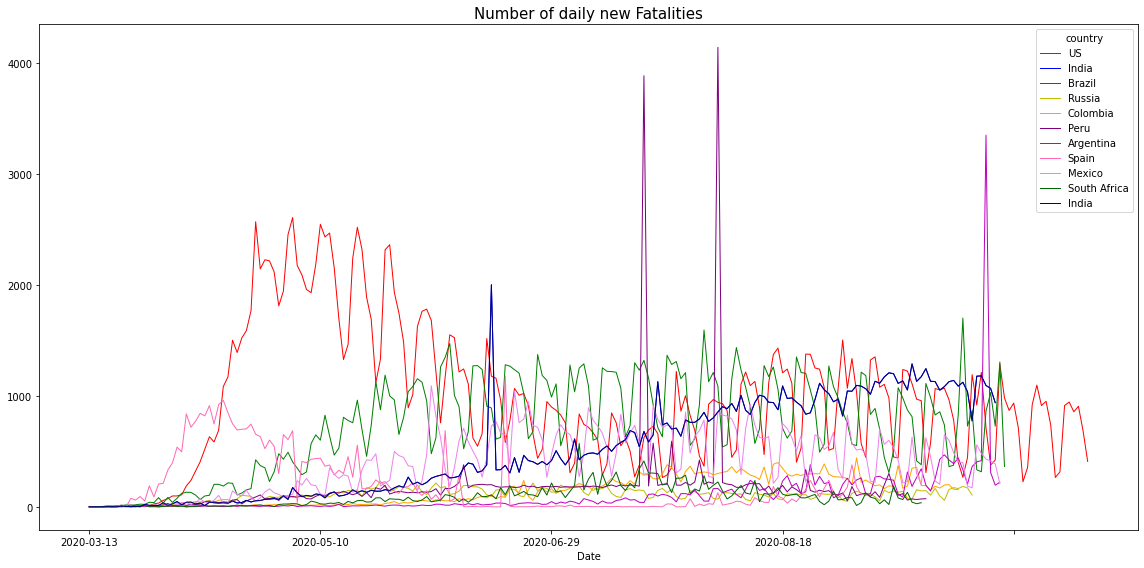

In [ ]:
Fatal_pivot=pd.pivot_table(df_covid,index='Date',columns='Country',values='Deaths',aggfunc=np.sum)
plt.figure(figsize=(16,8))
for i,country in enumerate(list_countries):
    Fatal_diff=Fatal_pivot[(Fatal_pivot[country]>0)][country].diff().fillna(0)
    Fatal_diff=Fatal_diff[Fatal_diff>0]
    Fatal_diff.plot(color=colors[i],label=country,lw=1)
    plt.title('Number of daily new Fatalities',fontsize=15)
    plt.legend(title='country')
plt.tight_layout()

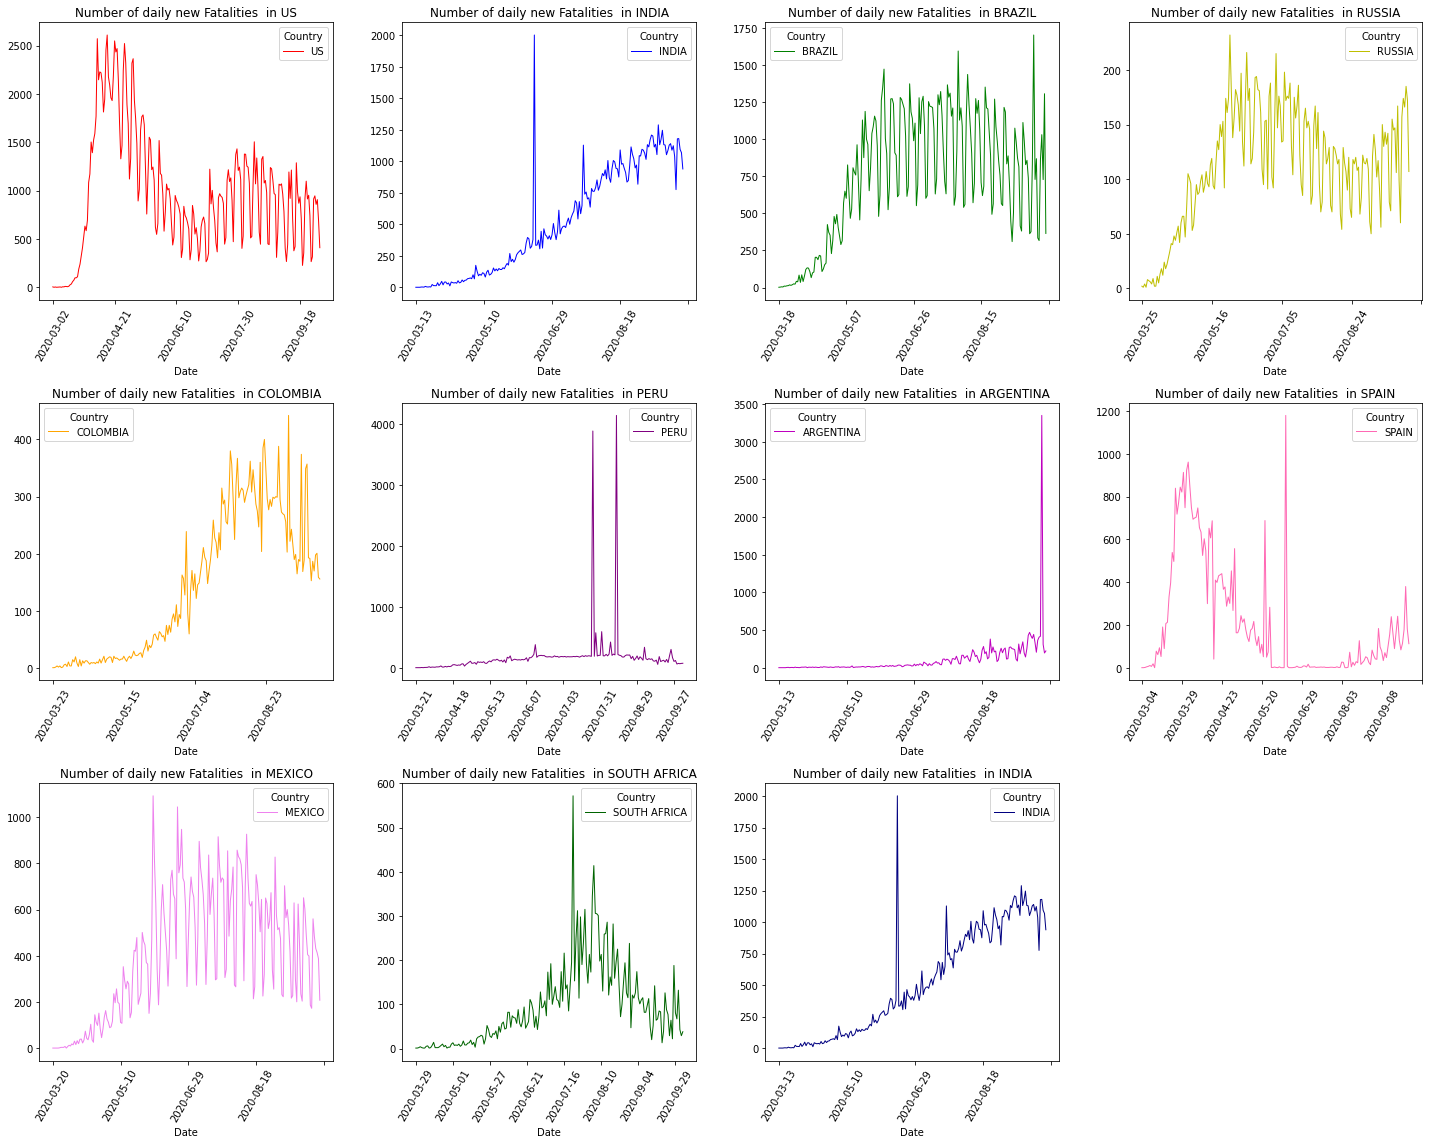

In [ ]:
plt.figure(figsize=(20,16))
for i,country in enumerate(list_countries):
    Fatal_diff=Fatal_pivot[(Fatal_pivot[country]>0)][country].diff().fillna(0)
    Fatal_diff=Fatal_diff[Fatal_diff>0]
    plt.subplot(3,4,i+1)
    Fatal_diff.plot(color=colors[i],label=country.upper(),lw=1)
    plt.xticks(rotation=60)
    plt.title('Number of daily new Fatalities  in {}'.format(country.upper()))
    plt.legend(title='Country')
plt.tight_layout()


Text(0.5, 0.98, 'Variation in number of confirmed cases on daily basis')

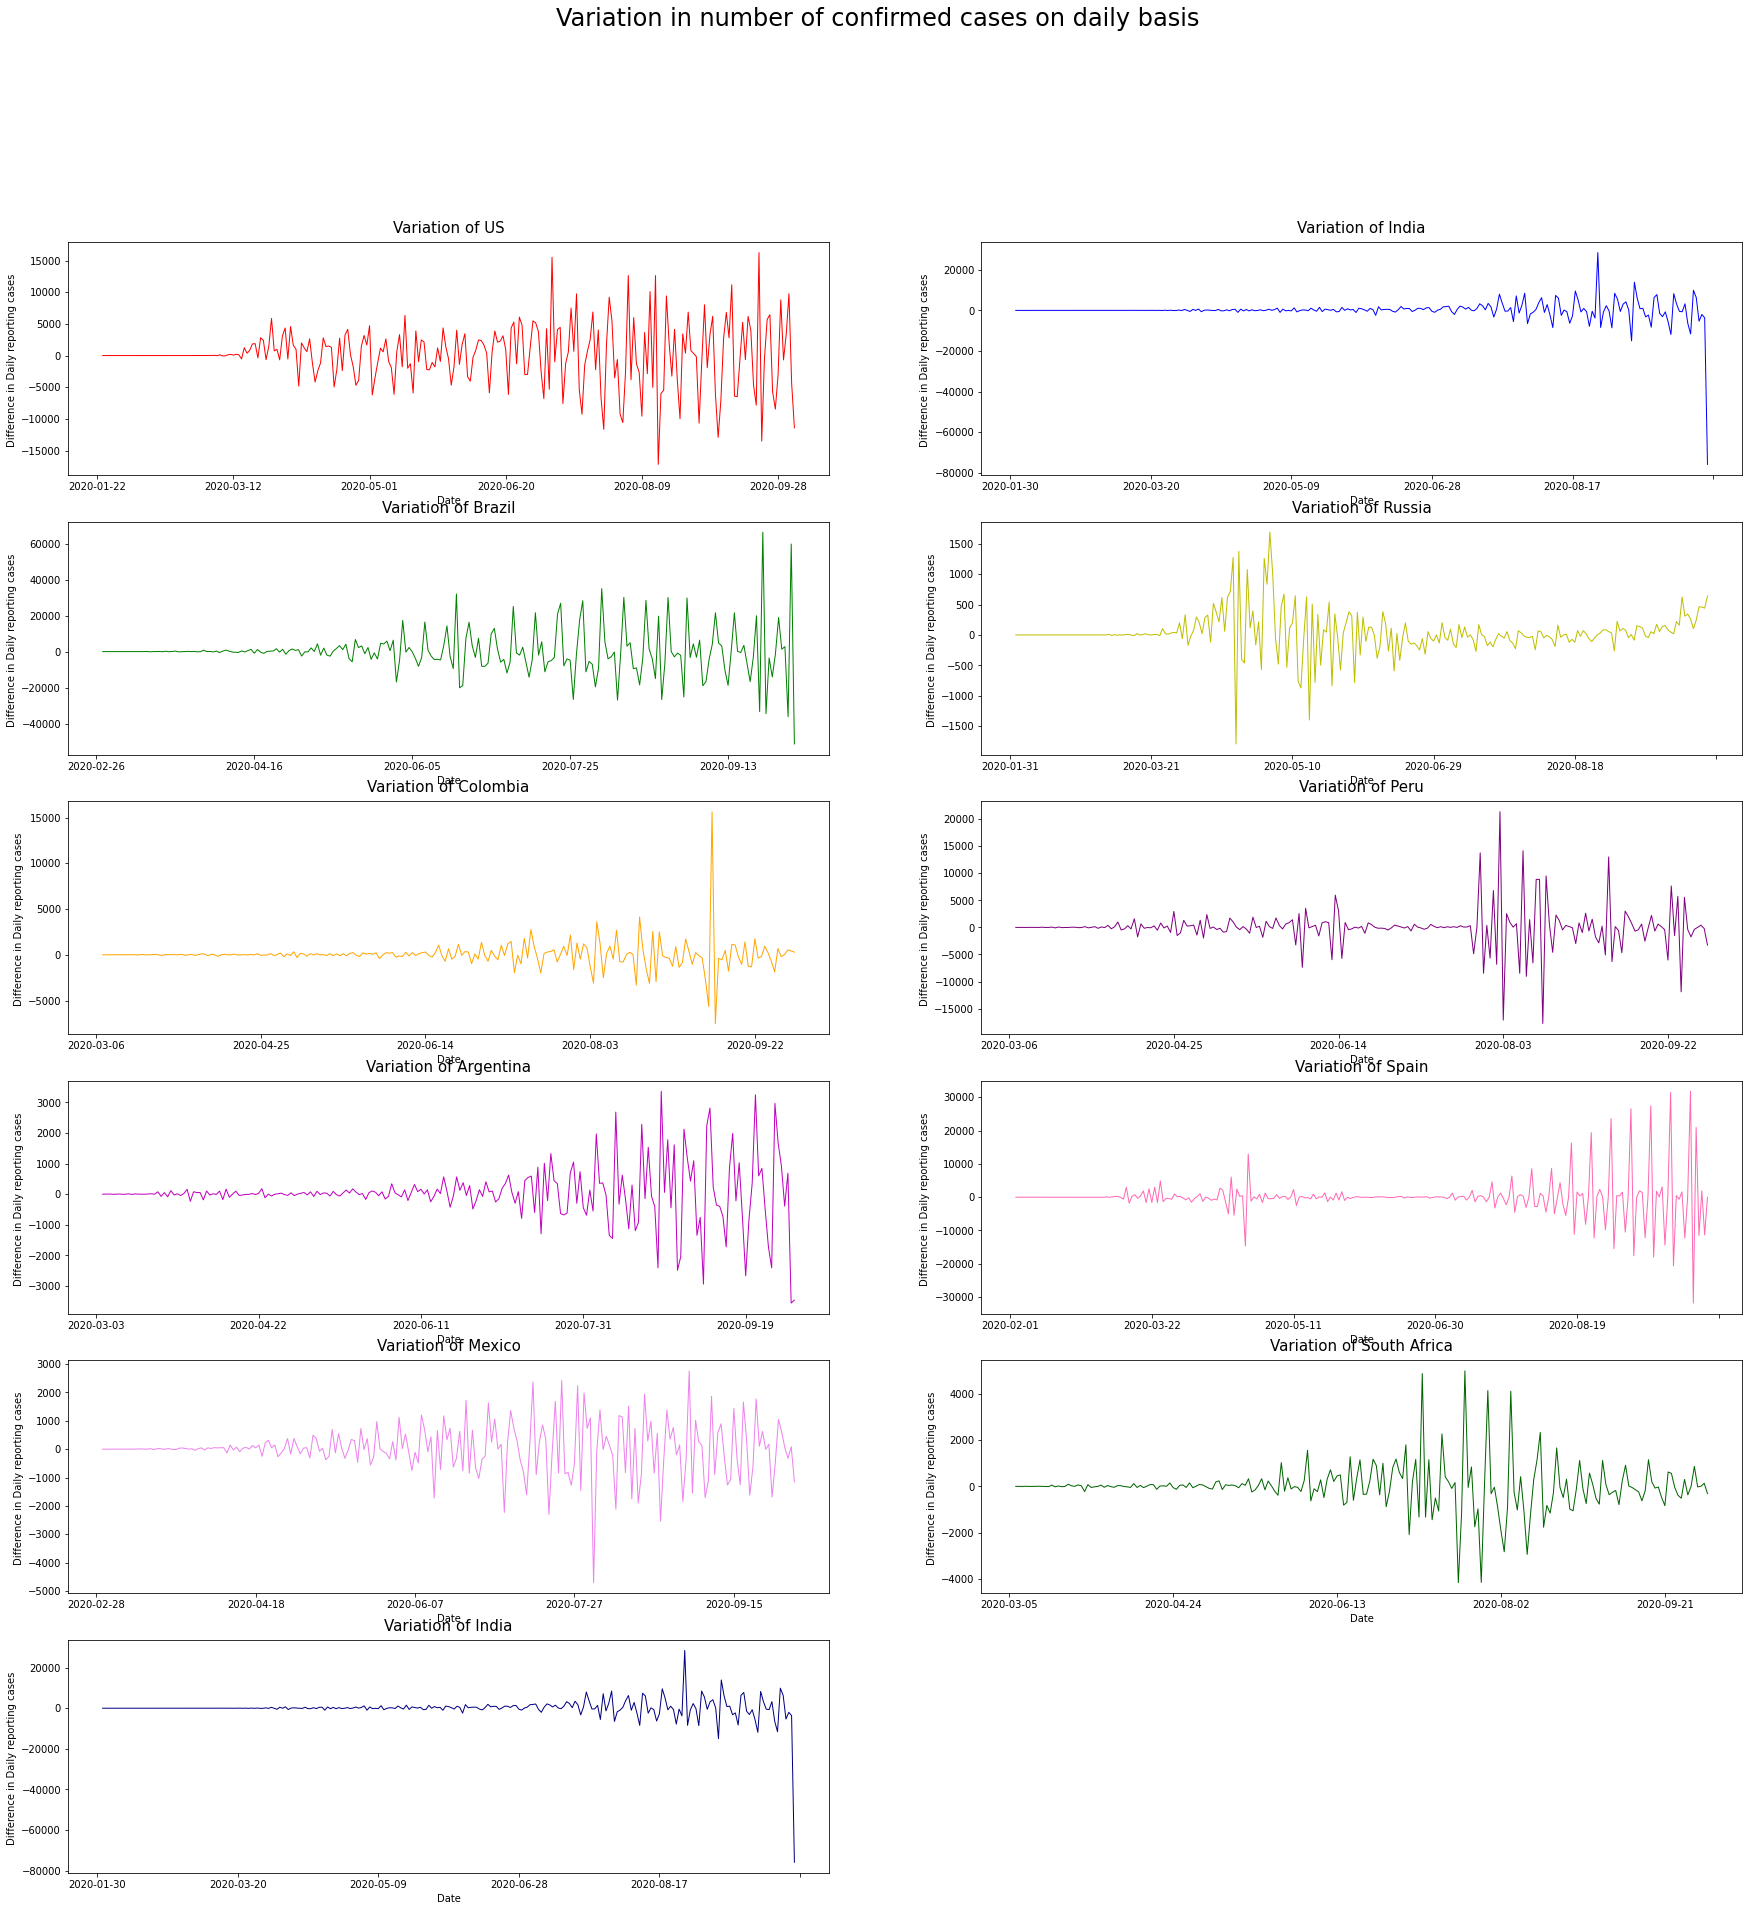

In [ ]:
# Understanding New cases confirmation variations on daily basis
plt.figure(figsize=(30,30))
for i,country in enumerate(list_countries):
    plt.subplot(6,2,i+1)
    df_covid[(df_covid['Country']==country)&(df_covid['Confirmed']!=0)].groupby('Date')['Confirmed'].sum().diff().diff().plot(color=colors[i],lw=1)
    plt.ylabel('Difference in Daily reporting cases ')
    plt.title('Variation of {}'.format(country),va='bottom',fontsize=15)
plt.suptitle('Variation in number of confirmed cases on daily basis',fontsize=24,va='baseline')

Text(0.5, 1.0, 'Cumulative trend plot for Fatality Cases')

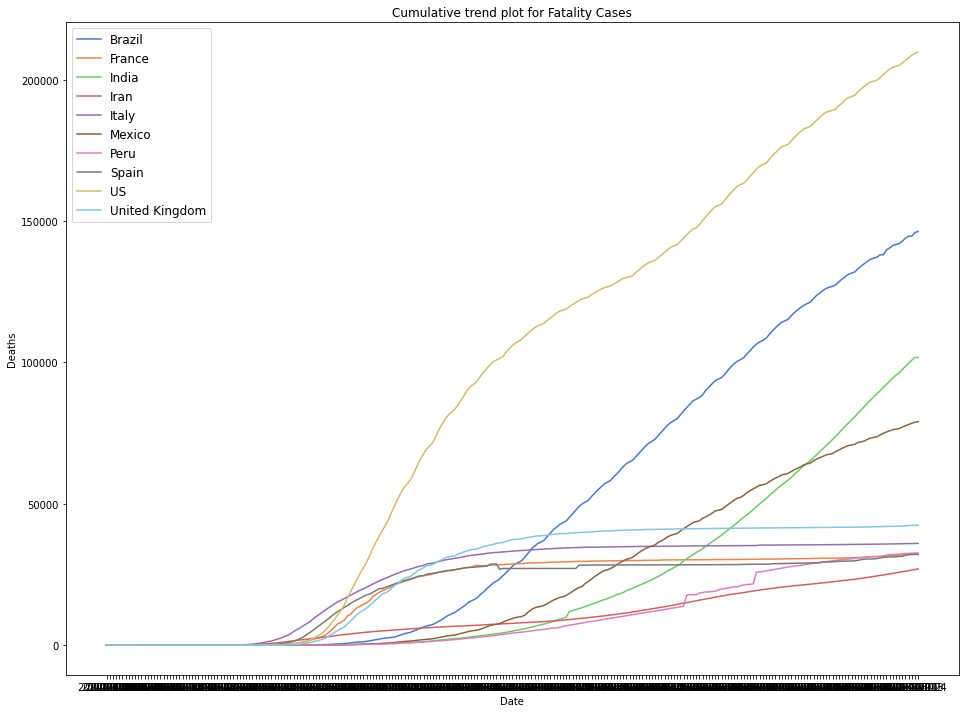

In [ ]:
top_deaths=df.sort_values(by='Deaths',ascending=False)[:10]
list_countries_deaths=list(top_deaths.index)
list_countries_deaths.append('India')
times_series_cntr_deaths = df_covid.groupby(['Date','Country'])['Deaths'].sum()\
                    .reset_index().set_index('Date')
df_countries_tm_deaths = times_series_cntr_deaths[times_series_cntr_deaths['Country'].isin(list_countries_deaths)]


plt.figure(figsize=(16,12))
ax = sns.lineplot(x=df_countries_tm_deaths.index, y="Deaths", hue="Country", data=df_countries_tm_deaths,palette='muted').set_title('Cumulative line')
plt.legend(loc=2, prop={'size': 12})
plt.title('Cumulative trend plot for Fatality Cases')



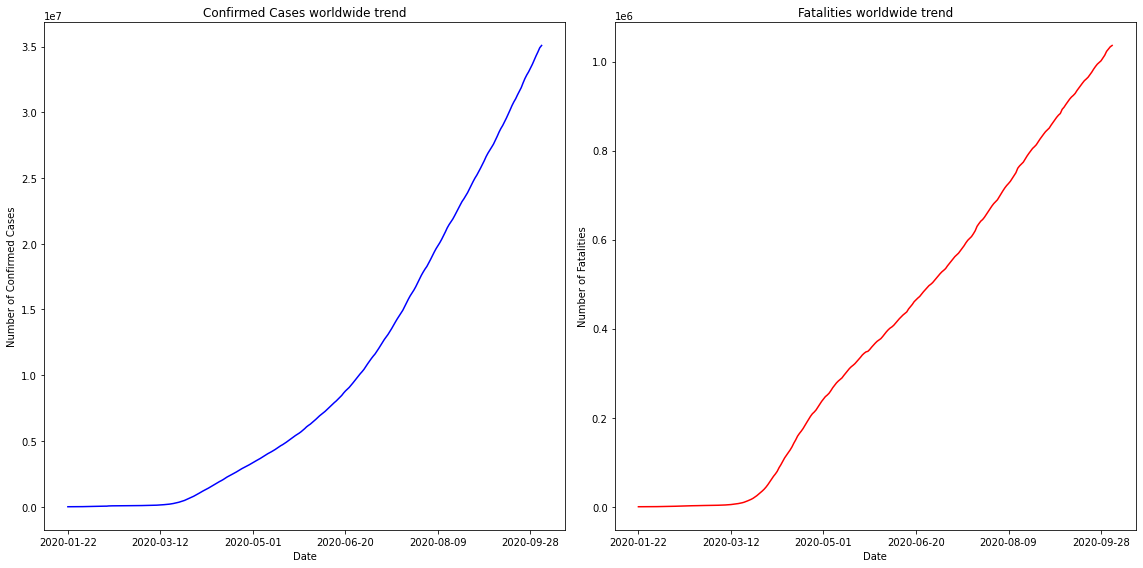

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
df_covid.groupby('Date')['Confirmed'].sum().plot(color='blue')
plt.ylabel('Number of Confirmed Cases')
plt.title('Confirmed Cases worldwide trend')

plt.subplot(1,2,2)
df_covid.groupby('Date')['Deaths'].sum().plot(color='r')
plt.ylabel('Number of Fatalities')
plt.title("Fatalities worldwide trend")

plt.tight_layout()

Text(0.5, 1.0, 'Cumulative trend plot for Recovered Cases')

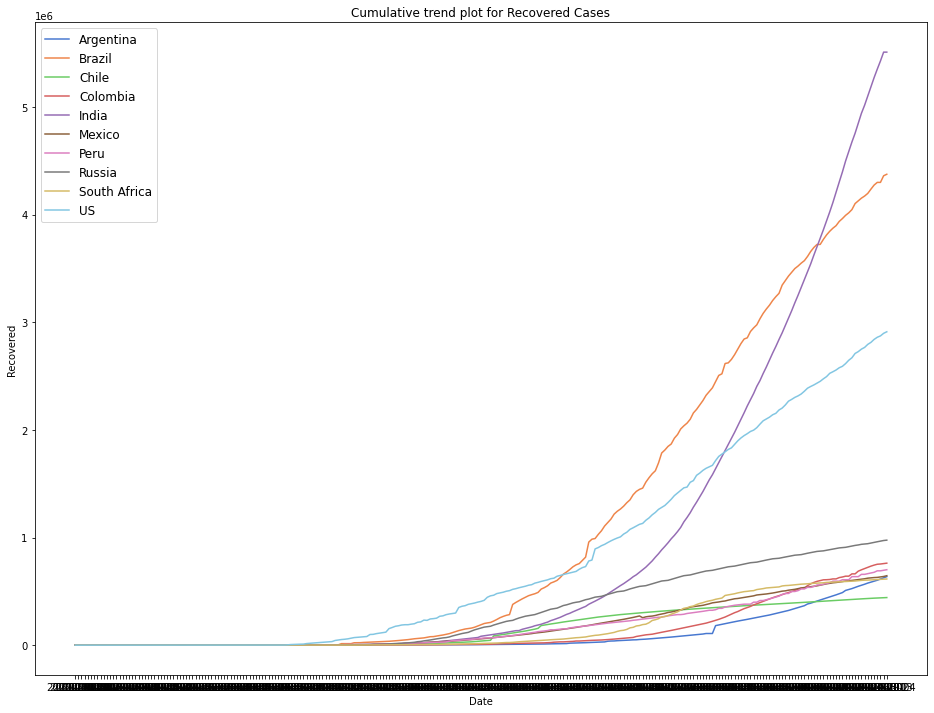

In [ ]:
top_recovered=df.sort_values(by='Recovered',ascending=False)[:10]
list_countries_rec=list(top_recovered.index)
list_countries_rec.append('India')
times_series_cntr_rec = df_covid.groupby(['Date','Country'])['Recovered'].sum()\
                    .reset_index().set_index('Date')
df_countries_tm_rec = times_series_cntr_rec[times_series_cntr_rec['Country'].isin(list_countries_rec)]


plt.figure(figsize=(16,12))
ax = sns.lineplot(x=df_countries_tm_rec.index, y="Recovered", hue="Country", data=df_countries_tm_rec,palette='muted').set_title('Cumulative line')
plt.legend(loc=2, prop={'size': 12})
plt.title('Cumulative trend plot for Recovered Cases')


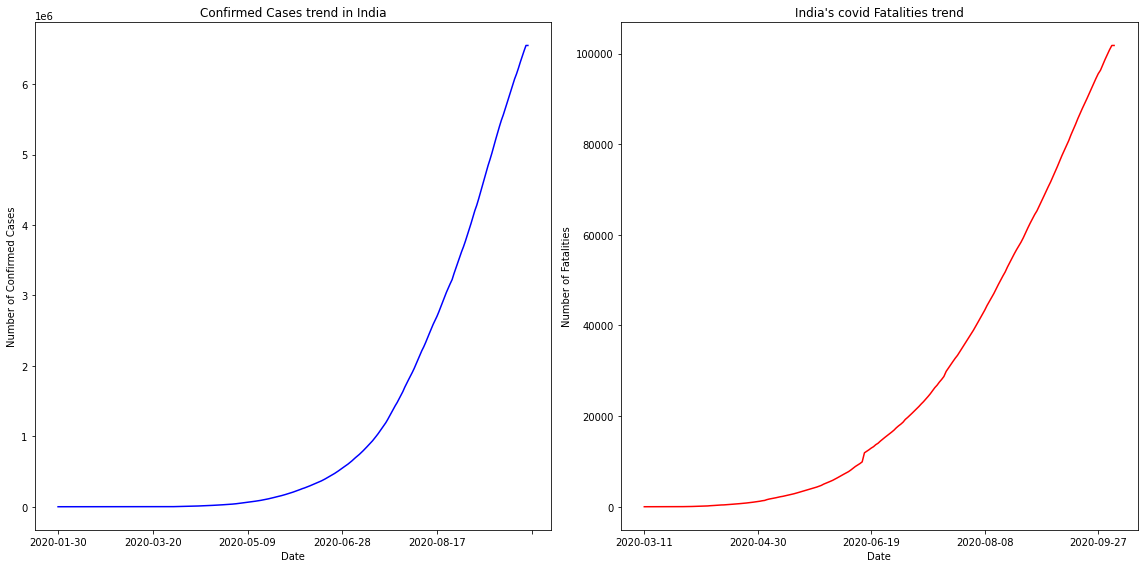

In [ ]:
# Confirmed Cases and Fatalities trend in India
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
df_covid[(df_covid['Country']=='India')&(df_covid['Confirmed']!=0)].groupby('Date')['Confirmed'].sum().plot(color='blue')
plt.ylabel('Number of Confirmed Cases')
plt.title('Confirmed Cases trend in India')

plt.subplot(1,2,2)
df_covid[(df_covid['Country']=='India')&(df_covid['Deaths']!=0)].groupby('Date')['Deaths'].sum().plot(color='red')
plt.ylabel('Number of Fatalities')
plt.title("India's covid Fatalities trend")
plt.tight_layout()


Text(0.5, 1.0, 'Covid trend in India')

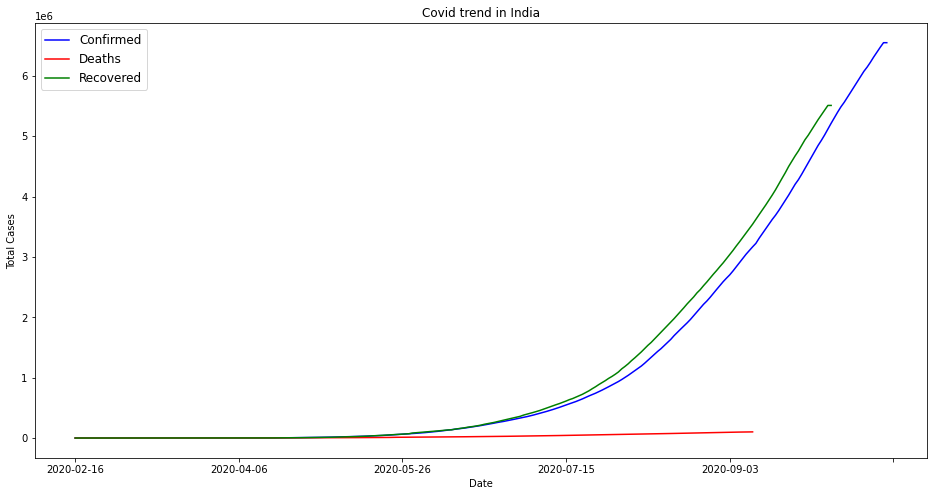

In [ ]:
plt.figure(figsize=(16,8))
df_covid[(df_covid['Country']=='India')&(df_covid['Confirmed']!=0)].groupby('Date')['Confirmed'].sum().plot(color='blue')
df_covid[(df_covid['Country']=='India')&(df_covid['Deaths']!=0)].groupby('Date')['Deaths'].sum().plot(color='red')
df_covid[(df_covid['Country']=='India')&(df_covid['Recovered']!=0)].groupby('Date')['Recovered'].sum().plot(color='green')
plt.ylabel('Total Cases')
plt.legend(loc=2, prop={'size': 12})
plt.title('Covid trend in India')


In [ ]:
India_confirmed=df_covid[(df_covid['Country']=='India')&(df_covid['Confirmed']!=0)].groupby('Date')['Confirmed'].sum()
India_fatality=df_covid[(df_covid['Country']=='India')&(df_covid['Deaths']!=0)].groupby('Date')['Deaths'].sum()
India_recovered=df_covid[(df_covid['Country']=='India')&(df_covid['Recovered']!=0)].groupby('Date')['Recovered'].sum()
print("India's 1st date of confirmed case to total cases in India \n", India_confirmed)
print("------------------------------------------------------------------")
print("India's 1st date of covid fatality to total fatalities due to covid in India \n",India_fatality)
print("------------------------------------------------------------------")
print("India's 1st date of covid recovery  case to total recovered cases in India \n",India_recovered)
print("------------------------------------------------------------------")
print("----Note:-This data was made from 22nd Jan 2020--------")

India's 1st date of confirmed case to total cases in India 
 Date
2020-01-30          1
2020-01-31          1
2020-02-01          1
2020-02-02          2
2020-02-03          3
               ...   
2020-09-30    6312584
2020-10-01    6394068
2020-10-02    6473544
2020-10-03    6549373
2020-10-04    6549373
Name: Confirmed, Length: 249, dtype: int64
------------------------------------------------------------------
India's 1st date of covid fatality to total fatalities due to covid in India 
 Date
2020-03-11         1
2020-03-12         1
2020-03-13         2
2020-03-14         2
2020-03-15         2
               ...  
2020-09-30     98678
2020-10-01     99773
2020-10-02    100842
2020-10-03    101782
2020-10-04    101782
Name: Deaths, Length: 208, dtype: int64
------------------------------------------------------------------
India's 1st date of covid recovery  case to total recovered cases in India 
 Date
2020-02-16          3
2020-02-17          3
2020-02-18          3
2020-02-19  

In [ ]:
world_confirmed=df_covid.groupby('Date')['Confirmed'].sum()
world_fatality=df_covid.groupby('Date')['Deaths'].sum()
world_recovered=df_covid.groupby('Date')['Recovered'].sum()
print("World's 1st date of confirmed case to total cases in world \n", world_confirmed)
print("------------------------------------------------------------------")
print("World's 1st date of covid fatality to total fatalities due to covid in world \n",world_fatality)
print("------------------------------------------------------------------")
print("World's 1st date of covid recovery case to total recovered cases in world \n",world_recovered)
print("------------------------------------------------------------------")
print("----Note:-This data was made from 22nd Jan 2020------")

World's 1st date of confirmed case to total cases in world 
 Date
2020-01-22         555
2020-01-23         654
2020-01-24         941
2020-01-25        1434
2020-01-26        2118
                ...   
2020-09-30    33968093
2020-10-01    34287271
2020-10-02    34582698
2020-10-03    34902647
2020-10-04    35079152
Name: Confirmed, Length: 257, dtype: int64
------------------------------------------------------------------
World's 1st date of covid fatality to total fatalities due to covid in world 
 Date
2020-01-22         17
2020-01-23         18
2020-01-24         26
2020-01-25         42
2020-01-26         56
               ...   
2020-09-30    1014161
2020-10-01    1022859
2020-10-02    1027827
2020-10-03    1033177
2020-10-04    1036111
Name: Deaths, Length: 257, dtype: int64
------------------------------------------------------------------
World's 1st date of covid recovery case to total recovered cases in world 
 Date
2020-01-22          28
2020-01-23          30
2020-01-24 

In [9]:
cntry = df_covid.groupby('Country')['Confirmed'].max().reset_index()
contry=cntry.sort_values(by='Confirmed',ascending=False)[:10]
contry

,Country,Confirmed
174,US,7420971
79,India,6549373
23,Brazil,4915289
140,Russia,1209039
37,Colombia,855052
134,Peru,821564
6,Argentina,798486
158,Spain,789932
113,Mexico,761665
156,South Africa,681289


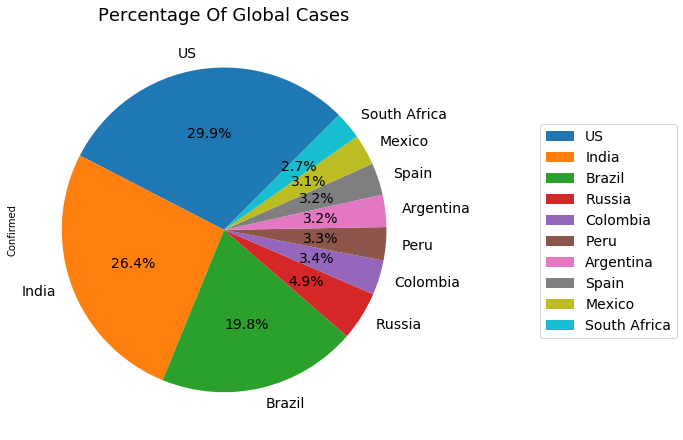

In [45]:
plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
contry.plot(kind='pie', y = 'Confirmed', ax=ax1, autopct='%1.1f%%', 
 startangle=45, shadow=False, labels=contry['Country'],  fontsize=14)
plt.legend( bbox_to_anchor=(0.7,0.5), loc="center right", fontsize=14, 
           bbox_transform=plt.gcf().transFigure)
title = plt.title('Percentage Of Global Cases',fontsize=18)

In [42]:
tot_deaths = df_covid.groupby('Country')['Deaths'].max().reset_index()
cntry_tot_deaths=tot_deaths.sort_values(by='Deaths',ascending=False)[:10]
cntry_tot_deaths

,Country,Deaths
174,US,209794
23,Brazil,146352
79,India,101782
113,Mexico,79088
178,United Kingdom,42440
85,Italy,35986
134,Peru,32609
62,France,32171
158,Spain,32086
81,Iran,26957


Text(0.5, 1.0, 'Percentage Of Global covid fatalities')

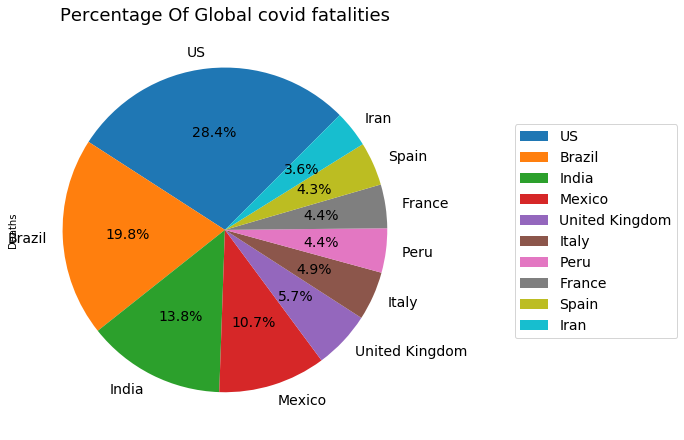

In [52]:
plt.figure(figsize=(16,8))
# plot chart
ax2 = plt.subplot(121, aspect='equal')
cntry_tot_deaths.plot(kind='pie', y = 'Deaths', ax=ax2, autopct='%1.1f%%', 
 startangle=45, shadow=False, labels=cntry_tot_deaths['Country'],  fontsize=14)
plt.legend( bbox_to_anchor=(0.7,0.5), loc="center right", fontsize=14,bbox_transform=plt.gcf().transFigure)
plt.title('Percentage Of Global covid fatalities',fontsize=18)

In [53]:
tot_recover = df_covid.groupby('Country')['Recovered'].max().reset_index()
cntry_tot_rec=tot_recover.sort_values(by='Recovered',ascending=False)[:10]
cntry_tot_rec

,Country,Recovered
79,India,5509966
23,Brazil,4375354
174,US,2911699
140,Russia,975488
37,Colombia,761674
134,Peru,700868
113,Mexico,645123
6,Argentina,636672
156,South Africa,614781
35,Chile,442070


Text(0.5, 1.0, 'Percentage Of Global covid Recovery')

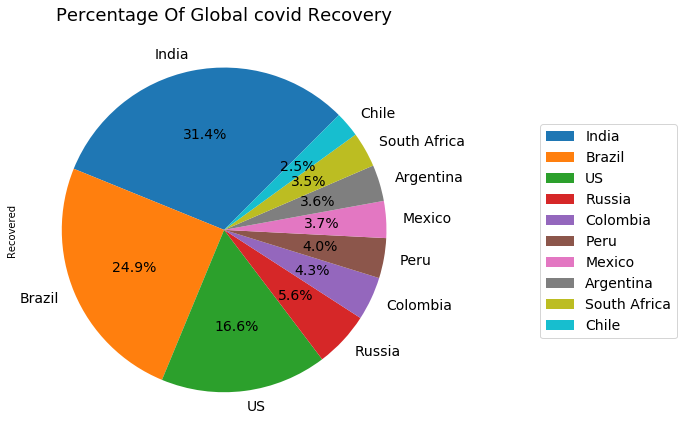

In [54]:
plt.figure(figsize=(16,8))
# plot chart
ax2 = plt.subplot(121, aspect='equal')
cntry_tot_rec.plot(kind='pie', y = 'Recovered', ax=ax2, autopct='%1.1f%%', 
 startangle=45, shadow=False, labels=cntry_tot_rec['Country'],  fontsize=14)
plt.legend( bbox_to_anchor=(0.7,0.5), loc="center right", fontsize=14,bbox_transform=plt.gcf().transFigure)
plt.title('Percentage Of Global covid Recovery',fontsize=18)

In [55]:
df_covid

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0
...,...,...,...,...,...
48311,2020-09-30,Zimbabwe,7838,6303,228
48312,2020-10-01,Zimbabwe,7850,6312,228
48313,2020-10-02,Zimbabwe,7858,6322,228
48314,2020-10-03,Zimbabwe,7885,6327,228


In [56]:
country_cases

,Country,Confirmed,Deaths,Recovered,Active,Death Rate (per 100),Recovered Rate (per 100)
0,Afghanistan,39341,1462,32852,5027,3.72,83.51
1,Albania,14266,396,8675,5195,2.78,60.81
2,Algeria,52136,1760,36578,13798,3.38,70.16
3,Andorra,2110,53,1540,517,2.51,72.99
4,Angola,5402,195,2577,2630,3.61,47.70
...,...,...,...,...,...,...,...
183,West Bank and Gaza,41498,330,34698,6470,0.80,83.61
184,Western Sahara,10,1,8,1,10.00,80.00
185,Yemen,2041,591,1320,130,28.96,64.67
186,Zambia,15052,333,14187,532,2.21,94.25


In [57]:
#Sorted decending w.r.t Active cases
cntry_tot_act=country_cases.sort_values(by='Active',ascending=False)[:10]
cntry_tot_act

,Country,Confirmed,Deaths,Recovered,Active,Death Rate (per 100),Recovered Rate (per 100)
174,US,7420971,209794,2911699,4299478,2.83,39.24
79,India,6549373,101782,5509966,937625,1.55,84.13
158,Spain,789932,32086,150376,607470,4.06,19.04
62,France,629509,32171,100281,497057,5.11,15.93
178,United Kingdom,505619,42440,2403,460776,8.39,0.48
23,Brazil,4915289,146352,4375354,393583,2.98,89.02
140,Russia,1209039,21260,975488,212291,1.76,80.68
6,Argentina,798486,21018,636672,140796,2.63,79.73
122,Netherlands,141226,6508,4381,130337,4.61,3.10
176,Ukraine,232424,4495,103762,124167,1.93,44.64


Text(0.5, 1.0, '10 Worst Affected Nations w.r.t. Active cases')

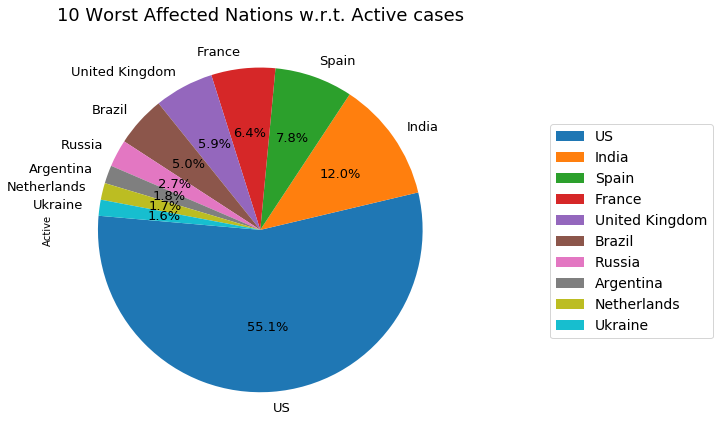

In [67]:
plt.figure(figsize=(16,8))
# plot chart
ax2 = plt.subplot(121, aspect='equal')
cntry_tot_act.plot(kind='pie', y='Active', ax=ax2, autopct='%1.1f%%', 
 startangle=175, shadow=False, labels=cntry_tot_act['Country'],  fontsize=13)
plt.legend( bbox_to_anchor=(0.7,0.5), loc="center right", fontsize=14,bbox_transform=plt.gcf().transFigure)
plt.title('10 Worst Affected Nations w.r.t. Active cases',fontsize=18)

In [4]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_covid['Country']=LE.fit_transform(df_covid['Country'])
df_covid['Date']=LE.fit_transform(df_covid['Date'])


In [5]:
df_covid

,Date,Country,Confirmed,Recovered,Deaths
0,0,0,0,0,0
1,1,0,0,0,0
2,2,0,0,0,0
3,3,0,0,0,0
4,4,0,0,0,0
...,...,...,...,...,...
48311,252,187,7838,6303,228
48312,253,187,7850,6312,228
48313,254,187,7858,6322,228
48314,255,187,7885,6327,228


In [6]:
df_x=df_covid.drop(columns=["Deaths"])
df_y=df_covid[["Deaths"]]

In [55]:
df_x

,Date,Country,Confirmed,Recovered
0,0,0,0,0
1,1,0,0,0
2,2,0,0,0
3,3,0,0,0
4,4,0,0,0
...,...,...,...,...
48311,252,187,7838,6303
48312,253,187,7850,6312
48313,254,187,7858,6322
48314,255,187,7885,6327


In [9]:
df_y

,Deaths
0,0
1,0
2,0
3,0
4,0
...,...
48311,228
48312,228
48313,228
48314,228


In [22]:
y=df_y

In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [11]:
x

,Date,Country,Confirmed,Recovered
0,-1.725324,-1.722862,-0.156034,-0.154080
1,-1.711845,-1.722862,-0.156034,-0.154080
2,-1.698366,-1.722862,-0.156034,-0.154080
3,-1.684887,-1.722862,-0.156034,-0.154080
4,-1.671408,-1.722862,-0.156034,-0.154080
...,...,...,...,...
48311,1.671408,1.722862,-0.133314,-0.124053
48312,1.684887,1.722862,-0.133279,-0.124010
48313,1.698366,1.722862,-0.133256,-0.123963
48314,1.711845,1.722862,-0.133177,-0.123939


In [24]:
#to find random stat which gives maximum r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,df_x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [25]:
#lets make a function which evaluates the model using cross_val_score
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    c_scores=cross_val_score(model,x,y,cv=5,scoring="r2")
    print("Mean r2 score for regressor: ",c_scores.mean())
    print("standard deviation in r2 score for regressor: ",c_scores.std())
    print(c_scores)

In [61]:
#Lets use pca to reduce the dimensionality
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
x_pca=pca.fit_transform(x)
print("vraiance :{}".format(np.sum(pca.explained_variance_ratio_)))

vraiance :1.0


In [27]:
#Lets use decision tree
from sklearn.tree import DecisionTreeRegressor
import numpy as np
dtr=DecisionTreeRegressor()
r_state=maxr2_score(dtr,x_pca,y)

r2 score corresponding to  42  is  0.9973661535428797
r2 score corresponding to  43  is  0.9942899218176224
r2 score corresponding to  44  is  0.9948759676048886
r2 score corresponding to  45  is  0.9978537206543648
r2 score corresponding to  46  is  0.9959713074706487
r2 score corresponding to  47  is  0.9952159211743051
r2 score corresponding to  48  is  0.9985140142784587
r2 score corresponding to  49  is  0.9735323180712618
r2 score corresponding to  50  is  0.998956202986981
r2 score corresponding to  51  is  0.9981118301750527
r2 score corresponding to  52  is  0.9956913332075589
r2 score corresponding to  53  is  0.9989087556485129
r2 score corresponding to  54  is  0.9950694330090791
r2 score corresponding to  55  is  0.9952900321299841
r2 score corresponding to  56  is  0.9974561701351394
r2 score corresponding to  57  is  0.9879364484539764
r2 score corresponding to  58  is  0.9953194089165739
r2 score corresponding to  59  is  0.9956943571830144
r2 score corresponding to  60

In [28]:
#lets use random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
rfr=RandomForestRegressor()
parameters = {"n_estimators":[10,100,500]}
clf = GridSearchCV(rfr, parameters, cv=5,scoring="r2")
clf.fit(x_pca,y)
clf.best_params_

{'n_estimators': 100}

In [29]:

rfr=RandomForestRegressor(n_estimators=100)
r_state=maxr2_score(rfr,x_pca,y)

r2 score corresponding to  42  is  0.9991622112257943
r2 score corresponding to  43  is  0.9978734142634197
r2 score corresponding to  44  is  0.9983463504105625
r2 score corresponding to  45  is  0.998968141284424
r2 score corresponding to  46  is  0.9987249802389365
r2 score corresponding to  47  is  0.9992047048265453
r2 score corresponding to  48  is  0.9992280853902046
r2 score corresponding to  49  is  0.9972725976708102
r2 score corresponding to  50  is  0.9993329113263143
r2 score corresponding to  51  is  0.9996315370807427
r2 score corresponding to  52  is  0.9990942332130062
r2 score corresponding to  53  is  0.9995428624287012
r2 score corresponding to  54  is  0.99729565778624
r2 score corresponding to  55  is  0.9986653962677018
r2 score corresponding to  56  is  0.9992779926995667
r2 score corresponding to  57  is  0.9978551582235596
r2 score corresponding to  58  is  0.9990290902899608
r2 score corresponding to  59  is  0.9984323001025373
r2 score corresponding to  60  

In [30]:
#lets check KNN 
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
parameters = {"n_neighbors":range(2,30)}
clf = GridSearchCV(knr, parameters, cv=5,scoring="r2")
clf.fit(x_pca, y)
clf.best_params_

{'n_neighbors': 29}

In [31]:
knr=KNeighborsRegressor(n_neighbors=29)
r_state=maxr2_score(knr,x_pca,y)

r2 score corresponding to  42  is  0.9763500499330612
r2 score corresponding to  43  is  0.9750231443108627
r2 score corresponding to  44  is  0.9778694318664725
r2 score corresponding to  45  is  0.9736148021923818
r2 score corresponding to  46  is  0.9788919018187512
r2 score corresponding to  47  is  0.97533305583471
r2 score corresponding to  48  is  0.9687321827228057
r2 score corresponding to  49  is  0.9742547205319456
r2 score corresponding to  50  is  0.9743075737897231
r2 score corresponding to  51  is  0.9786252091164364
r2 score corresponding to  52  is  0.9801857877665113
r2 score corresponding to  53  is  0.9773430775102283
r2 score corresponding to  54  is  0.9661568037236846
r2 score corresponding to  55  is  0.9791075624313772
r2 score corresponding to  56  is  0.9767797984556007
r2 score corresponding to  57  is  0.9712816600126324
r2 score corresponding to  58  is  0.9750242537309084
r2 score corresponding to  59  is  0.9770107559548447
r2 score corresponding to  60 

In [32]:
#Lets use SVM regressor
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")
svr=SVR()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svr, parameters, cv=5,scoring="r2")
clf.fit(x_pca,y)
clf.best_params_

{'C': 10, 'kernel': 'linear'}

In [33]:
svr=SVR(kernel="linear",C=10)
r_state=maxr2_score(svr,x_pca,y)

r2 score corresponding to  42  is  0.7894044471972965
r2 score corresponding to  43  is  0.8454685448884925
r2 score corresponding to  44  is  0.8332594711066743
r2 score corresponding to  45  is  0.8304217486765945
r2 score corresponding to  46  is  0.8132978914071403
r2 score corresponding to  47  is  0.8208764914549879
r2 score corresponding to  48  is  0.8060164884583716
r2 score corresponding to  49  is  0.8039432935424293
r2 score corresponding to  50  is  0.822404681181643
r2 score corresponding to  51  is  0.8296921045384383
r2 score corresponding to  52  is  0.8565914109023851
r2 score corresponding to  53  is  0.8361043232298798
r2 score corresponding to  54  is  0.789194048055672
r2 score corresponding to  55  is  0.8409020232012405
r2 score corresponding to  56  is  0.8461369529853828
r2 score corresponding to  57  is  0.7888741132054979
r2 score corresponding to  58  is  0.836551921759525
r2 score corresponding to  59  is  0.8272801528016079
r2 score corresponding to  60  

In [34]:
print("DECISION TREE REGRESSOR\n\n")
model_evaluation(dtr,x_pca,y)

DECISION TREE REGRESSOR


Mean r2 score for regressor:  0.47483297041110395
standard deviation in r2 score for regressor:  0.19192705417970726
[0.83873782 0.47514907 0.28360727 0.37779527 0.39887542]


In [35]:
print("RANDOM FOREST REGRESSOR\n\n")
model_evaluation(rfr,x_pca,y)

RANDOM FOREST REGRESSOR


Mean r2 score for regressor:  0.4925996626277172
standard deviation in r2 score for regressor:  0.2293374021039858
[0.83161831 0.54416675 0.55524509 0.12678689 0.40518127]


In [36]:
print("KNN REGRESSOR\n\n")
model_evaluation(knr,x_pca,y)

KNN REGRESSOR


Mean r2 score for regressor:  0.5247994956061786
standard deviation in r2 score for regressor:  0.14831526942317452
[0.77931049 0.40078411 0.52456573 0.35635521 0.56298195]


In [37]:
print("SVM REGRESSOR\n\n")
model_evaluation(svr,x_pca,y)

SVM REGRESSOR


Mean r2 score for regressor:  0.6182312147367492
standard deviation in r2 score for regressor:  0.19807481806520547
[0.93541058 0.538839   0.37439329 0.49921757 0.74329565]


In [38]:
#Based on above r2 scores 
#lets make model using SVM
x_train, x_test, y_train, y_test = train_test_split(x_pca, y,random_state = 71,test_size=0.20)
svr.fit(x_train,y_train)
y_pred = svr.predict(x_test)

In [39]:
#Lets find the rmse and r2_score using sklearn.metrics for SVM model
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  4657.717852154475
r2_score is:  0.8580315807153267


In [40]:
#Lets use random forest also
x_train, x_test, y_train, y_test = train_test_split(x_pca, y,random_state = 51,test_size=0.20)
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)

In [41]:
#Lets find the rmse and r2_score using sklearn.metrics for random forest model
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  225.4377060049237
r2_score is:  0.9996483278494299


In [62]:
import pickle
filename='covid.pkl'

pickle.dump(rfr,open(filename,'wb'))